#### Alfredo Winston - 2702297776

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
import pickle

# Remove Warnings
from warnings import filterwarnings
filterwarnings('ignore')

#### Overview Data

In [4]:
df = pd.read_csv('Dataset_B_Hotel.csv')

df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0.0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0.0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0.0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


#### Checking Number of Rows and Columns Dataset

In [6]:
df.shape

(36275, 19)

#### Checking Dataset Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Checking Missing Values per Column

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

Booking_ID                                 0
no_of_adults                               0
no_of_children                             0
no_of_weekend_nights                       0
no_of_week_nights                          0
type_of_meal_plan                        907
required_car_parking_space              1270
room_type_reserved                         0
lead_time                                  0
arrival_year                               0
arrival_month                              0
arrival_date                               0
market_segment_type                        0
repeated_guest                             0
no_of_previous_cancellations               0
no_of_previous_bookings_not_canceled       0
avg_price_per_room                      1632
no_of_special_requests                     0
booking_status                             0
dtype: int64


#### Checking Duplicate Data

In [12]:
duplicates = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")

Number of Duplicate Rows: 0


#### Checking Values Data per Column

In [14]:
for i in df.columns:
    print(f"Value counts untuk {i}:")
    print(df[i].value_counts())
    print()

Value counts untuk Booking_ID:
Booking_ID
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: count, Length: 36275, dtype: int64

Value counts untuk no_of_adults:
no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

Value counts untuk no_of_children:
no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

Value counts untuk no_of_weekend_nights:
no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

Value counts untuk no_of_week_nights:
no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

Value cou

#### Boxplot Numerical Features

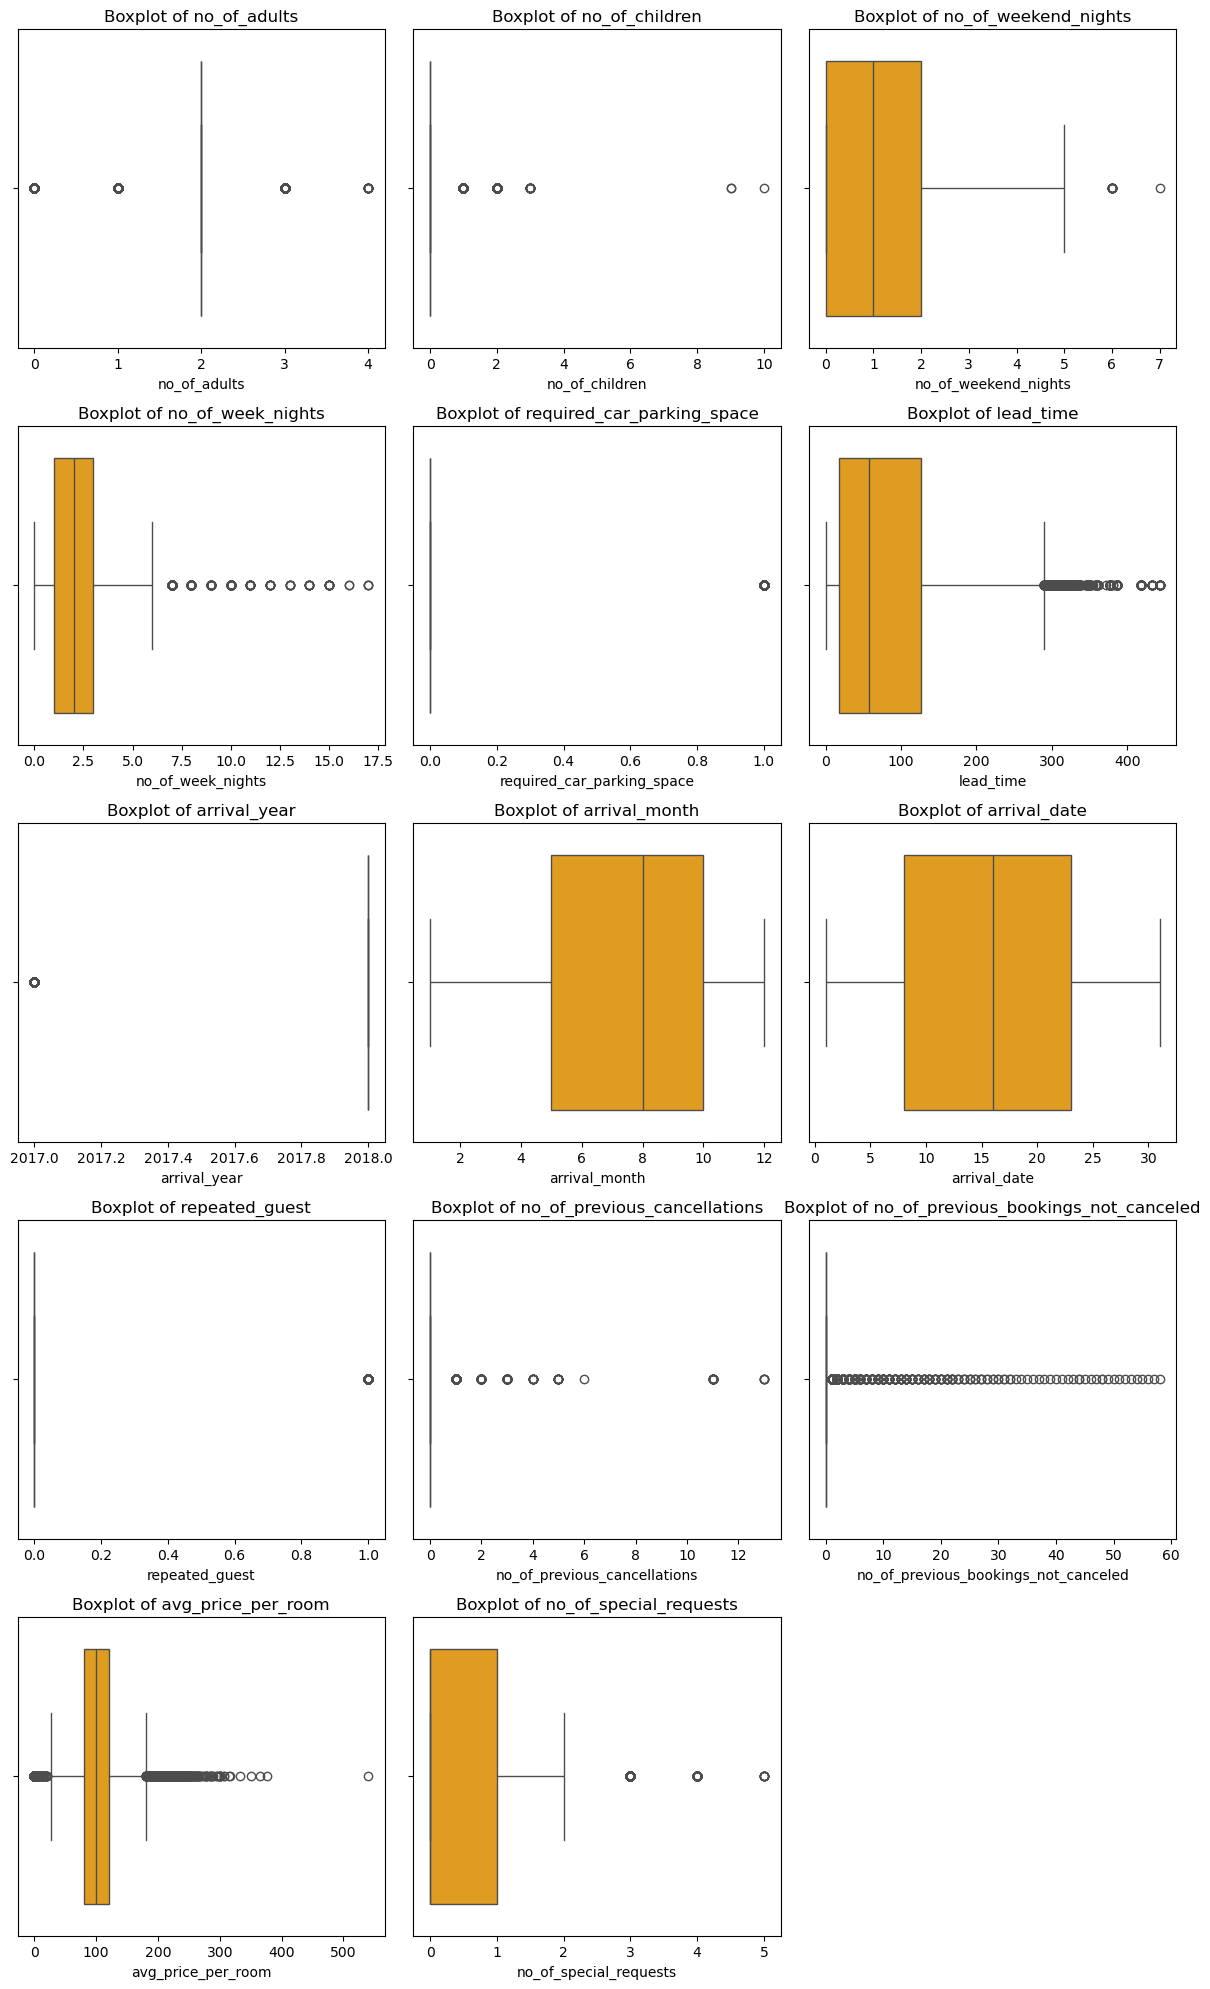

In [16]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

num_features = len(numerical_features)
num_rows = (num_features // 3) + (num_features % 3 > 0)

plt.figure(figsize=(12, num_rows * 4))
for i, col in enumerate(numerical_features):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(x=df[col], color="orange")
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

Masalah pada Dataset
- Missing Values pada Kolom [type_of_meal_plan],[required_car_parking_space], dan [avg_price_per_room]

#### Drop Missing Values

In [19]:
df = df.dropna()

#### Encoding

In [21]:
label_encoding = preprocessing.LabelEncoder()
df['booking_status'] = label_encoding.fit_transform(df['booking_status'])
df['arrival_year'] = label_encoding.fit_transform(df['arrival_year'])

df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,0,10,2,Offline,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,1,11,6,Online,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,1,2,28,Online,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,1,5,20,Online,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,1,4,11,Online,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0.0,Room_Type 4,85,1,8,3,Online,0,0,0,167.80,1,1
36271,INN36272,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,228,1,10,17,Online,0,0,0,90.95,2,0
36272,INN36273,2,0,2,6,Meal Plan 1,0.0,Room_Type 1,148,1,7,1,Online,0,0,0,98.39,2,1
36273,INN36274,2,0,0,3,Not Selected,0.0,Room_Type 1,63,1,4,21,Online,0,0,0,94.50,0,0


In [22]:
onehot_enc = OneHotEncoder(sparse_output=False)

columns_encode = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

encoded_array = onehot_enc.fit_transform(df[columns_encode])
encoded_df = pd.DataFrame(encoded_array, columns = onehot_enc.get_feature_names_out(columns_encode))

df = df.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

df = df.drop(columns=columns_encode)

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,INN00001,2,0,1,2,0.0,224,0,10,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,INN00002,2,0,2,3,0.0,5,1,11,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,INN00003,1,0,2,1,0.0,1,1,2,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,INN00004,2,0,0,2,0.0,211,1,5,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,INN00005,2,0,1,1,0.0,48,1,4,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Splitting Data (80% Training & 20% Testing)

In [24]:
x = df.drop(['Booking_ID','booking_status'], axis = 1)
y = df['booking_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('train data: ',x_train.shape)
print('test data: ',x_test.shape)

train data:  (26085, 30)
test data:  (6522, 30)


#### Random Forest Model

In [26]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names = ['Canceled','Not_Canceled']))

Accuracy: 0.9027905550444649

Classification Report:
               precision    recall  f1-score   support

    Canceled       0.89      0.80      0.84      2107
Not_Canceled       0.91      0.95      0.93      4415

    accuracy                           0.90      6522
   macro avg       0.90      0.88      0.89      6522
weighted avg       0.90      0.90      0.90      6522



#### XG Boost

In [28]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names = ['Canceled','Not_Canceled']))

Accuracy: 0.8975774302361239

Classification Report:
               precision    recall  f1-score   support

    Canceled       0.87      0.80      0.83      2107
Not_Canceled       0.91      0.94      0.93      4415

    accuracy                           0.90      6522
   macro avg       0.89      0.87      0.88      6522
weighted avg       0.90      0.90      0.90      6522



#### Analisis Kedua Model

Berdasarkan hasil yang diperoleh dari kedua model yang sudah diuji, model Random Forest sedikit lebih unggul dibandingkan XGBoost, dengan akurasi yang lebih tinggi (0.9028 vs 0.8976). Meskipun kedua model memiliki precision dan recall yang hampir sama untuk kelas 1 (positif), Random Forest lebih baik dalam hal precision untuk kelas 0 (negatif), menunjukkan kemampuannya dalam mengidentifikasi kelas negatif dengan lebih tepat. Secara keseluruhan, Random Forest menunjukkan performa yang lebih seimbang antara precision, recall, dan F1-score, menjadikannya pilihan yang lebih baik untuk dataset ini.